In [4]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')

In [3]:
!pip install opendatasets

In [5]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/akshaygaikwad448/pizza-delivery-data-with-enhanced-features/data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: samifying
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/akshaygaikwad448/pizza-delivery-data-with-enhanced-features


100%|██████████| 119k/119k [00:00<00:00, 103MB/s]

The dataset taken contains real-world-style pizza sales data collected over the year 2024–2025. It includes:
1. Order ID – Unique identifier for each order
2. Date – Date of the transaction
3. Time – Time of order placement
4. Pizza Name – Name of the pizza (e.g., Margherita, Pepperoni)
5. Category – Type of pizza (e.g., Veg, Non-Veg, Classic, Gourmet)
6. Size – Size ordered (Small, Medium, Large, XL)
7. Quantity – Number of units ordered
8. Unit Price – Price per pizza
9. Total Price – Quantity × Unit Price
10. Toppings – List of toppings (where applicable)


In [6]:
data = pd.read_excel('/content/pizza-delivery-data-with-enhanced-features/Enhanced_pizza_sell_data_2024-25.xlsx')
data.head()


,Order ID,Restaurant Name,Location,Order Time,Delivery Time,Delivery Duration (min),Pizza Size,Pizza Type,Toppings Count,Distance (km),...,Topping Density,Order Month,Payment Category,Estimated Duration (min),Delay (min),Is Delayed,Pizza Complexity,Traffic Impact,Order Hour,Restaurant Avg Time
0,ORD001,Domino's,"New York, NY",2024-01-05 18:30:00,2024-01-05 18:45:00,15,Medium,Veg,3,2.5,...,1.200000,January,Online,6.0,9.0,False,6,2,18,30.259434
1,ORD002,Papa John's,"Los Angeles, CA",2024-02-14 20:00:00,2024-02-14 20:25:00,25,Large,Non-Veg,4,5.0,...,0.800000,February,Online,12.0,13.0,False,12,3,20,28.186275
2,ORD003,Little Caesars,"Chicago, IL",2024-03-21 12:15:00,2024-03-21 12:35:00,20,Small,Vegan,2,3.0,...,0.666667,March,Online,7.2,12.8,False,2,1,12,28.844221
3,ORD004,Pizza Hut,"Miami, FL",2024-04-10 19:45:00,2024-04-10 20:10:00,25,XL,Cheese Burst,5,4.5,...,1.111111,April,Offline,10.8,14.2,False,20,2,19,29.948454
4,ORD005,Marco's Pizza,"Dallas, TX",2024-05-05 13:00:00,2024-05-05 13:20:00,20,Medium,Non-Veg,3,2.0,...,1.500000,May,Online,4.8,15.2,False,6,3,13,30.286458


In [7]:
data.shape

(1004, 25)

In [8]:
data.columns

Index(['Order ID', 'Restaurant Name', 'Location', 'Order Time',
       'Delivery Time', 'Delivery Duration (min)', 'Pizza Size', 'Pizza Type',
       'Toppings Count', 'Distance (km)', 'Traffic Level', 'Payment Method',
       'Is Peak Hour', 'Is Weekend', 'Delivery Efficiency (min/km)',
       'Topping Density', 'Order Month', 'Payment Category',
       'Estimated Duration (min)', 'Delay (min)', 'Is Delayed',
       'Pizza Complexity', 'Traffic Impact', 'Order Hour',
       'Restaurant Avg Time'],
      dtype='object')

In [9]:
data = data[[#'Order ID',
       'Restaurant Name', 'Location', #'Order Time',
       #'Delivery Time',
       'Delivery Duration (min)', 'Pizza Size', #'Pizza Type',
       #'Toppings Count',
       'Distance (km)', 'Traffic Level', #'Payment Method',
       #'Is Peak Hour', 'Is Weekend', 'Delivery Efficiency (min/km)',
       #'Topping Density',
       'Order Month', 'Payment Category',
       'Estimated Duration (min)', 'Delay (min)', 'Is Delayed',
       #'Pizza Complexity', 'Traffic Impact',
       'Order Hour',
       'Restaurant Avg Time']].copy()

data.shape



(1004, 13)

Observing only the columns that are relevant for our research and analysis

In [10]:
data.head()

,Restaurant Name,Location,Delivery Duration (min),Pizza Size,Distance (km),Traffic Level,Order Month,Payment Category,Estimated Duration (min),Delay (min),Is Delayed,Order Hour,Restaurant Avg Time
0,Domino's,"New York, NY",15,Medium,2.5,Medium,January,Online,6.0,9.0,False,18,30.259434
1,Papa John's,"Los Angeles, CA",25,Large,5.0,High,February,Online,12.0,13.0,False,20,28.186275
2,Little Caesars,"Chicago, IL",20,Small,3.0,Low,March,Online,7.2,12.8,False,12,28.844221
3,Pizza Hut,"Miami, FL",25,XL,4.5,Medium,April,Offline,10.8,14.2,False,19,29.948454
4,Marco's Pizza,"Dallas, TX",20,Medium,2.0,High,May,Online,4.8,15.2,False,13,30.286458


In [11]:
data.tail()

,Restaurant Name,Location,Delivery Duration (min),Pizza Size,Distance (km),Traffic Level,Order Month,Payment Category,Estimated Duration (min),Delay (min),Is Delayed,Order Hour,Restaurant Avg Time
999,Domino's,"Albuquerque, NM",30,Large,5.5,Medium,July,Online,13.2,16.8,False,19,30.259434
1000,Pizza Hut,"Atlanta, GA",30,Medium,4.0,Low,July,Online,9.6,20.4,False,20,29.948454
1001,Papa John's,"Omaha, NE",30,Medium,5.0,Medium,July,Online,12.0,18.0,False,18,28.186275
1002,Little Caesars,"Louisville, KY",30,XL,6.0,High,July,Online,14.4,15.6,False,19,28.844221
1003,Marco's Pizza,"Milwaukee, WI",30,Medium,4.5,Medium,July,Online,10.8,19.2,False,20,30.286458


In [12]:
data.isna().sum()

,0
Restaurant Name,0
Location,0
Delivery Duration (min),0
Pizza Size,0
Distance (km),0
Traffic Level,0
Order Month,0
Payment Category,0
Estimated Duration (min),0
Delay (min),0


None of the rows are missing

In [13]:
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
999,False
1000,False
1001,False
1002,True


In [14]:
data.loc[data.duplicated()]

,Restaurant Name,Location,Delivery Duration (min),Pizza Size,Distance (km),Traffic Level,Order Month,Payment Category,Estimated Duration (min),Delay (min),Is Delayed,Order Hour,Restaurant Avg Time
56,Papa John's,"Phoenix, AZ",25,Medium,3.0,High,February,Online,7.2,17.8,False,20,28.186275
57,Little Caesars,"Atlanta, GA",20,Small,2.5,Low,February,Offline,6.0,14.0,False,19,28.844221
82,Little Caesars,"Dallas, TX",20,Medium,3.0,High,March,Online,7.2,12.8,False,18,28.844221
85,Domino's,"Miami, FL",20,Large,4.0,High,March,Online,9.6,10.4,False,18,30.259434
88,Pizza Hut,"Phoenix, AZ",25,XL,4.5,High,March,Online,10.8,14.2,False,19,29.948454
...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,Marco's Pizza,"Milwaukee, WI",30,Medium,4.5,Medium,June,Offline,10.8,19.2,False,20,30.286458
994,Domino's,"Albuquerque, NM",30,Large,5.5,Medium,June,Online,13.2,16.8,False,19,30.259434
995,Pizza Hut,"Atlanta, GA",30,Medium,4.0,Low,June,Online,9.6,20.4,False,20,29.948454
996,Papa John's,"Omaha, NE",30,Medium,5.0,Medium,June,Online,12.0,18.0,False,18,28.186275


In [20]:
data.query("`Delay (min)` == 17.8")


,Restaurant Name,Location,Delivery Duration (min),Pizza Size,Distance (km),Traffic Level,Order Month,Payment Category,Estimated Duration (min),Delay (min),Is Delayed,Order Hour,Restaurant Avg Time
11,Papa John's,"Houston, TX",25,Medium,3.0,Medium,January,Offline,7.2,17.8,False,19,28.186275
34,Marco's Pizza,"Seattle, WA",25,Medium,3.0,Low,February,Online,7.2,17.8,False,19,30.286458
36,Papa John's,"Phoenix, AZ",25,Medium,3.0,High,February,Online,7.2,17.8,False,20,28.186275
46,Papa John's,"Dallas, TX",25,Medium,3.0,Low,February,Online,7.2,17.8,False,20,28.186275
56,Papa John's,"Phoenix, AZ",25,Medium,3.0,High,February,Online,7.2,17.8,False,20,28.186275
76,Papa John's,"Phoenix, AZ",25,Medium,3.0,High,March,Online,7.2,17.8,False,20,28.186275
86,Papa John's,"Dallas, TX",25,Medium,3.0,Low,March,Online,7.2,17.8,False,20,28.186275
96,Papa John's,"Dallas, TX",25,Medium,3.0,Medium,April,Online,7.2,17.8,False,20,28.186275
106,Papa John's,"Phoenix, AZ",25,Medium,3.0,High,April,Online,7.2,17.8,False,20,28.186275
116,Papa John's,"Dallas, TX",25,Medium,3.0,Low,April,Online,7.2,17.8,False,20,28.186275


In this case, the rows can actually be duplicated because the same person can order the same pizzas from the same place with the estimated and actual delivery time being almost same. Hence no need to remove the duplicate rows here.

Visualising the data:

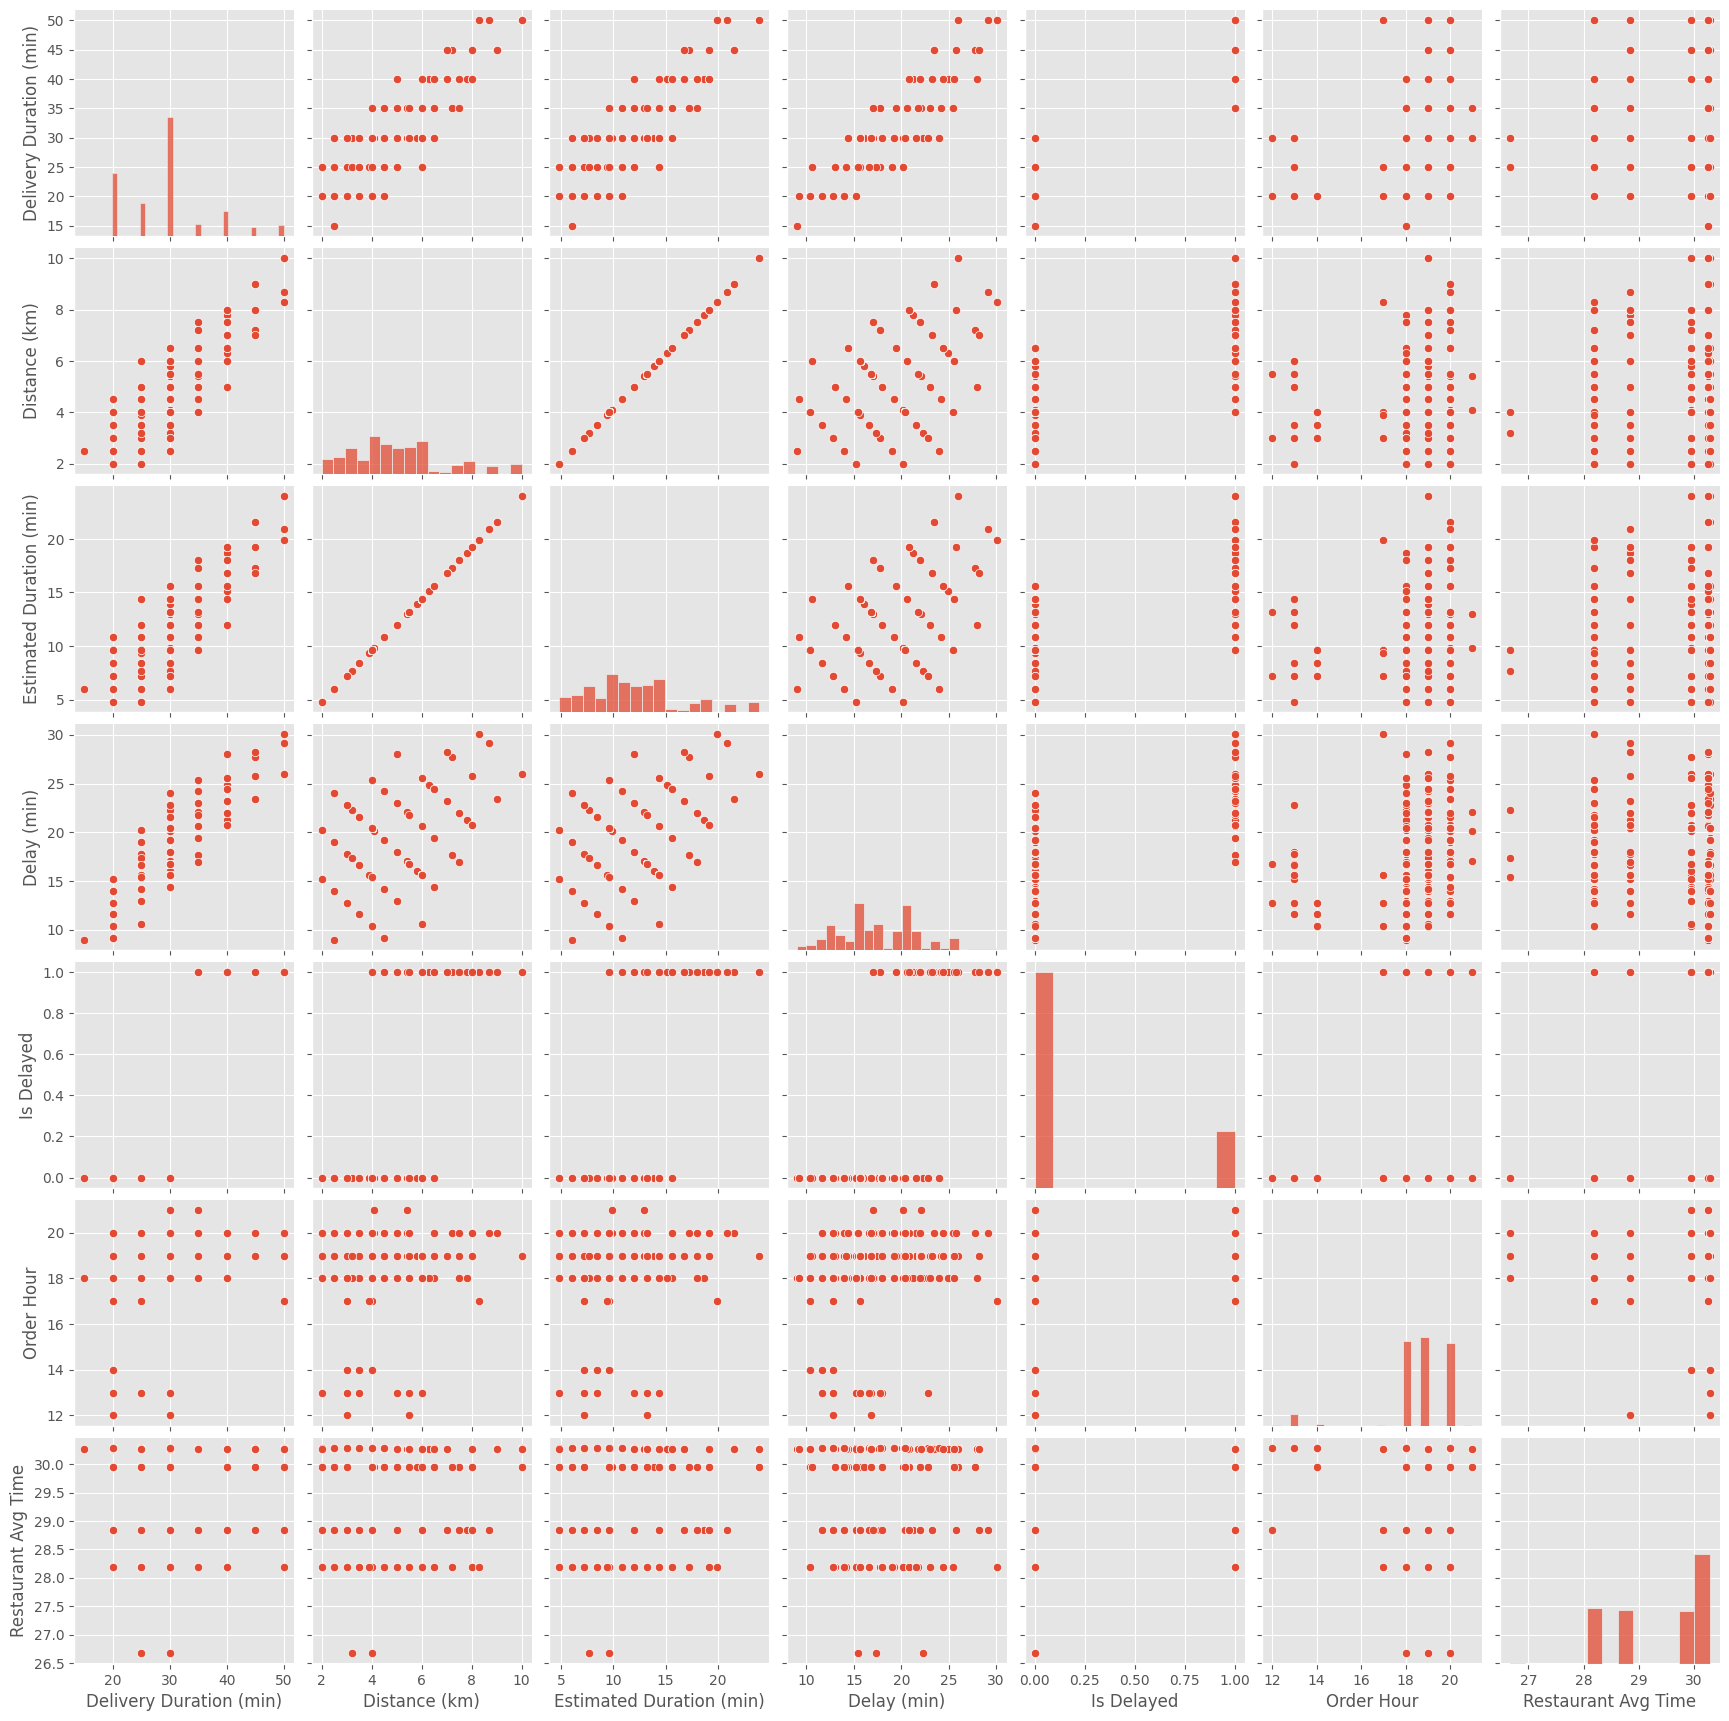

In [21]:
sns.pairplot(data)